# Curation of Core Mammalian Cardiac Proteome
In this notebook, we are merging the individual protein lists curated from proteomics experiments in four mammalian species. We remove duplicates, map these protein lists to genes, remove redundant proteins based on their sequence similarity, and generate figures to visualize these results.

In [1]:
from cardiac_proteome_caseolap._01_cardiac_protome_curation import *

## Merge experimental datasets

In [2]:
species_to_folder_and_db = {'human':( "./data/protein_lists/human_protein_lists",
                            "./data/uniprot_reference_proteomes/homo_sapiens_uniprot-proteome_UP000005640_2022-04-26.fasta"),
                           'mouse':( "./data/protein_lists/mouse_protein_lists",
                            "./data/uniprot_reference_proteomes/mus_musculus_uniprot-proteome_UP000000589_2022-04-26.fasta"),
                           'rat':( "./data/protein_lists/rat_protein_lists",
                            "./data/uniprot_reference_proteomes/rattus_norvegicus_uniprot-proteome_UP000002494_2022-04-26.fasta"),
                           'pig':( "./data/protein_lists/pig_protein_lists",
                            "./data/uniprot_reference_proteomes/sus_scrofa_uniprot-proteome_UP000008227_2022-04-26.fasta")}

In [3]:
species_to_unique_proteins_and_id_to_proteins = extract_proteomes(species_to_folder_and_db)

79052 proteins (17837 reviwed, 61215 unreviewed) in ./data/uniprot_reference_proteomes/homo_sapiens_uniprot-proteome_UP000005640_2022-04-26.fasta
Written to file ./protein_lists/merged_human_list.txt
55315 proteins (14755 reviwed, 40560 unreviewed) in ./data/uniprot_reference_proteomes/mus_musculus_uniprot-proteome_UP000000589_2022-04-26.fasta
Written to file ./protein_lists/merged_mouse_list.txt
29923 proteins (6935 reviwed, 22988 unreviewed) in ./data/uniprot_reference_proteomes/rattus_norvegicus_uniprot-proteome_UP000002494_2022-04-26.fasta
Written to file ./protein_lists/merged_rat_list.txt
49793 proteins (1242 reviwed, 48551 unreviewed) in ./data/uniprot_reference_proteomes/sus_scrofa_uniprot-proteome_UP000008227_2022-04-26.fasta
Written to file ./protein_lists/merged_pig_list.txt
human (9):
PXD028887_human 200
PXD004109 468
PXD006675 9737
PXD014592 5134
PXD012636_human 7077
PXD021261 1698
PXD023778 5926
PXD020175 2839
PXD024135 2953
mouse (8):
PXD008385 2474
PXD008736 461
PDX0288

Actually it is 37 datasets, since PXD009554_PXD009555_PXD009538 and mayer_pubs represent 3 datasets in one entry

## Map proteins to genes

In [14]:
unique_proteins, id_to_proteins = species_to_unique_proteins_and_id_to_proteins['Combined']
convert_uniprot_to_gene_names(unique_proteins)

HTTPError: HTTP Error 405: Not Allowed

As of 2022-07-18, UniProt API no longer works. TODO: fix this

46,120 out of 46,667 identifiers from UniProtKB AC/ID were successfully mapped to 19,264 Gene name IDs.

Now that we have a filtered list of proteins from the previous section, we uploaded that list to Uniprot to get a protein to gene mapping. Next we group proteins by their respective genes.

In [4]:
proteins_to_gene_map = "./mappings/merged_protein_lists_to_genes.txt"
protein_to_gene, gene_set = read_prot_to_gene_map(proteins_to_gene_map)

46120 proteins mapped to 19264 genes


In [5]:
species_to_gene_mapping_and_gene_set = separate_gene_mapping_by_species(species_to_unique_proteins_and_id_to_proteins, 
                                                                        protein_to_gene, debug=True)

human: 7614 genes 15617 proteins (out of 16883; difference: 1266)
mouse: 7406 genes 7988 proteins (out of 8393; difference: 405)
rat: 7198 genes 8360 proteins (out of 9373; difference: 1013)
pig: 5811 genes 6963 proteins (out of 7571; difference: 608)
Combined: 17928 genes 38928 proteins (out of 42220; difference: 3292)


## Protein-Gene Mapping histogram

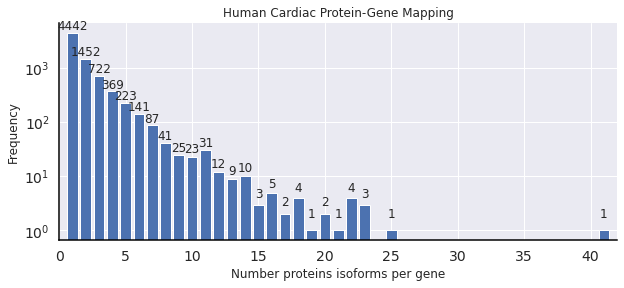

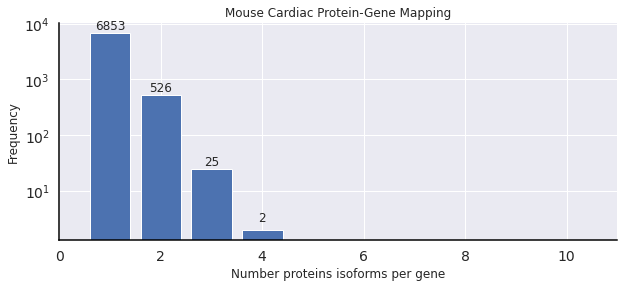

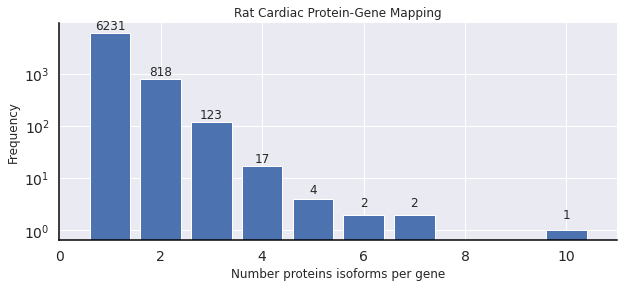

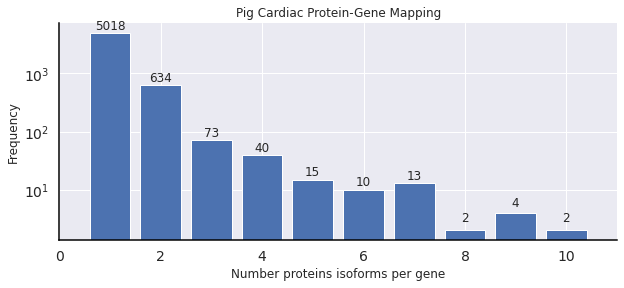

In [6]:
for species, gm_gs in species_to_gene_mapping_and_gene_set.items():
    if species != "Combined": # skip combined set
        prot_to_gene, gene_set = gm_gs
        
        # reverse the mapping from genes to proteins
        gene_to_prot = gene_to_proteins(prot_to_gene)
        
        out_file_name = "./figures/%s_gene_histogram.pdf"%(species)
        gene_histogram(gene_to_prot, tag = species.capitalize(), out_file=out_file_name)
        

### Two visualization plots
1. Histogram showing how many datasets each protein shows up and its frequency
2. Heatmap showing the number of overlapping proteins between pairs of datasets

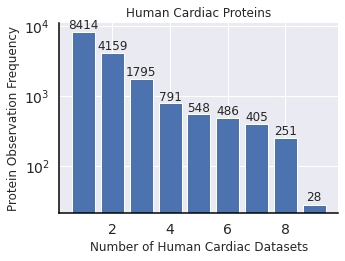

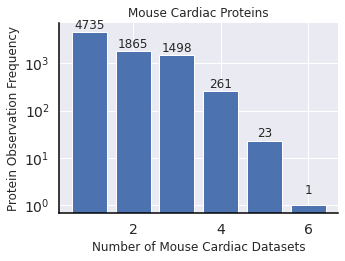

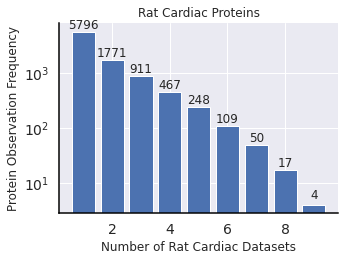

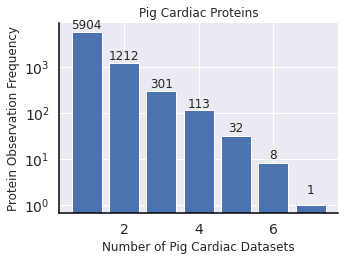

In [7]:
for species, up_idp in species_to_unique_proteins_and_id_to_proteins.items():
    if species != "Combined": # skip combined set
        unique_proteins, id_to_proteins = up_idp
        
        out_file_name = "./figures/%s_gene_histogram.pdf"%(species)
        protein_experiment_histogram(unique_proteins, id_to_proteins, tag = species.capitalize(),out_file=out_file_name)
        

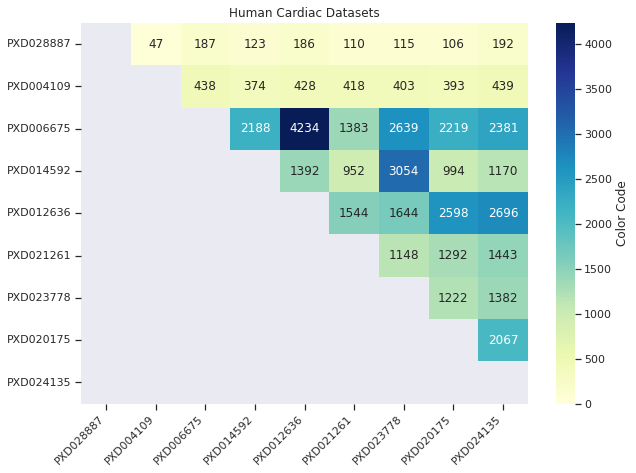

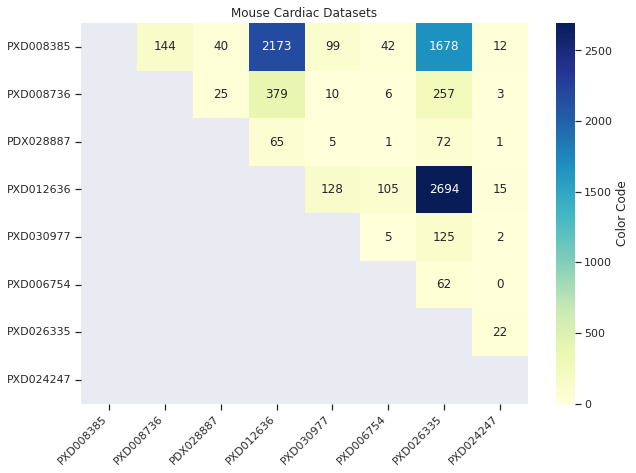

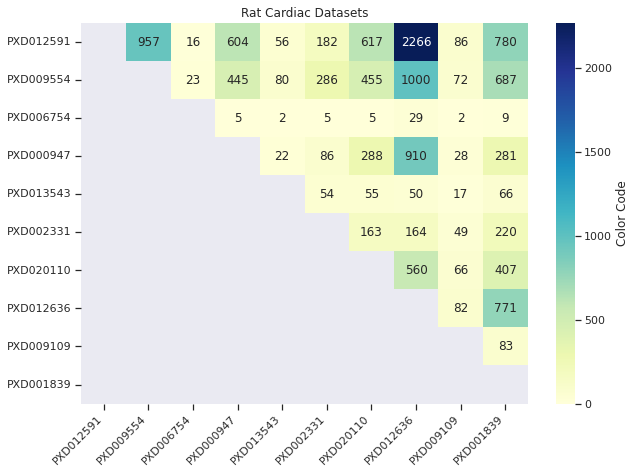

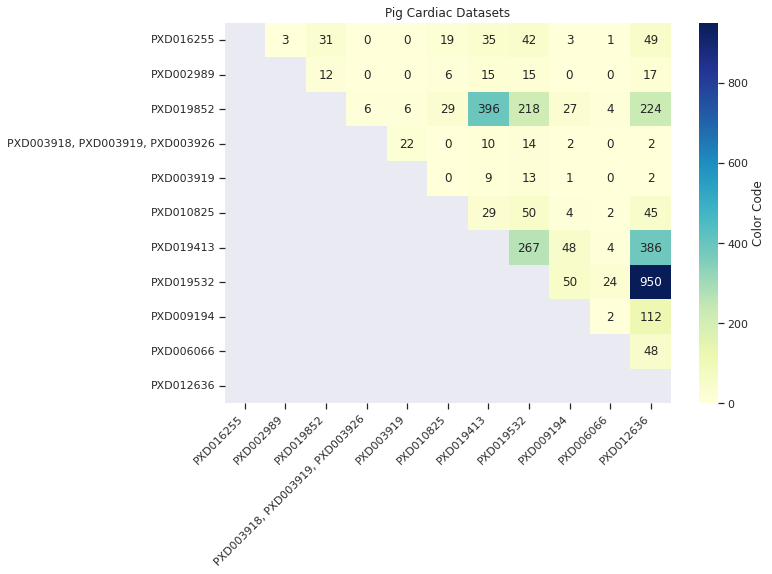

In [8]:
for species, up_idp in species_to_unique_proteins_and_id_to_proteins.items():
    if species != "Combined": # skip combined set
        unique_proteins, id_to_proteins = up_idp
        
        out_file_name = "./figures/%s_dataset_heatmap.pdf"%(species)
        protein_experiment_heatmap(id_to_proteins, tag = species.capitalize(),out_file=out_file_name)

## Remove Mutations based on sequence similiarity

In [14]:
# install biopython to download sequence alignment tool
# ! pip install biopython

In [9]:
species_to_database = {k:v[1] for k,v in species_to_folder_and_db.items()}
# extract the reviewed proteins from each proteome
species_to_reviewed_proteins = {}
# extract the protein to sequence map from fasta file
species_to_protein_to_seq = {}
for species, ref_proteome_file in species_to_database.items():
    print("### "+species+" ###")
    _, reviewed_proteins, _ = get_proteins_from_fasta(ref_proteome_file)
    species_to_reviewed_proteins[species] = reviewed_proteins
    species_to_protein_to_seq[species] = parse_fasta(ref_proteome_file)

### human ###
79052 proteins (17837 reviwed, 61215 unreviewed) in ./data/uniprot_reference_proteomes/homo_sapiens_uniprot-proteome_UP000005640_2022-04-26.fasta
79052 proteins parsed in ./data/uniprot_reference_proteomes/homo_sapiens_uniprot-proteome_UP000005640_2022-04-26.fasta
### mouse ###
55315 proteins (14755 reviwed, 40560 unreviewed) in ./data/uniprot_reference_proteomes/mus_musculus_uniprot-proteome_UP000000589_2022-04-26.fasta
55315 proteins parsed in ./data/uniprot_reference_proteomes/mus_musculus_uniprot-proteome_UP000000589_2022-04-26.fasta
### rat ###
29923 proteins (6935 reviwed, 22988 unreviewed) in ./data/uniprot_reference_proteomes/rattus_norvegicus_uniprot-proteome_UP000002494_2022-04-26.fasta
29923 proteins parsed in ./data/uniprot_reference_proteomes/rattus_norvegicus_uniprot-proteome_UP000002494_2022-04-26.fasta
### pig ###
49793 proteins (1242 reviwed, 48551 unreviewed) in ./data/uniprot_reference_proteomes/sus_scrofa_uniprot-proteome_UP000008227_2022-04-26.fasta
4

Biopython scores insertions and mismatch the same. That means a mismatch does not penalize twice.

In [10]:
species_to_cardiac_proteome = {}
for species, gm_gs in species_to_gene_mapping_and_gene_set.items():
    if species != "Combined": # skip combined set
        prot_to_gene, gene_set = gm_gs
        
        # reverse the mapping from genes to proteins
        gene_to_prot = gene_to_proteins(prot_to_gene)
        
        reviewed_list = species_to_reviewed_proteins[species]
        prot_to_seq = species_to_protein_to_seq[species]
        
        filtered_gene_to_protein_set = filter_gene_to_protein_set(gene_to_prot, 
                                                prot_to_seq, reviewed_list=reviewed_list,
                                                debug=False)
        species_to_cardiac_proteome[species] = filtered_gene_to_protein_set


## Output the cardiac proteome for each species

In [13]:
for species, cardiac_proteome in species_to_cardiac_proteome.items():
    output_cardiac_proteome(cardiac_proteome, out_file_name = "./protein_lists/%s_cardiac_proteome.txt"%(species))

7614 genes and 15229 proteins
15229 proteins written to ./protein_lists/human_cardiac_proteome.txt
7614 genes written to ./protein_lists/human_cardiac_proteome_genes.txt
7406 genes and 7816 proteins
7816 proteins written to ./protein_lists/mouse_cardiac_proteome.txt
7406 genes written to ./protein_lists/mouse_cardiac_proteome_genes.txt
7198 genes and 8015 proteins
8015 proteins written to ./protein_lists/rat_cardiac_proteome.txt
7198 genes written to ./protein_lists/rat_cardiac_proteome_genes.txt
5811 genes and 6884 proteins
6884 proteins written to ./protein_lists/pig_cardiac_proteome.txt
5811 genes written to ./protein_lists/pig_cardiac_proteome_genes.txt


## Generate the core mammalian cardiac proteome 

In [14]:
def load_cardiac_proteome(species_to_gene_and_protein_lists, gene_to_protein_mapping_file):
    # read the gene mapping (protein -> gene)
    protein_to_gene, _ = read_prot_to_gene_map(proteins_to_gene_map)
                                               
    # parse the cardiac proteomes for each species
    species_to_cardiac_proteome = {}
    for species, gene_protein_list_files in species_to_gene_and_protein_lists.items():
        # read the gene list
        gene_list = set([l.strip("\n") for l in open(gene_protein_list_files[1],"r").readlines()])
        # read the protein list
        protein_list = set([l.strip("\n") for l in open(gene_protein_list_files[0],"r").readlines()])
        
        # keep only gene to protein mappings found within gene and protein lists
        cardiac_proteome = {}
        for protein in protein_list:
            if protein in protein_to_gene:
                gene = protein_to_gene[protein]
                if gene not in cardiac_proteome:
                    cardiac_proteome[gene] = set()
                cardiac_proteome[gene].add(protein)
                
        genes_parsed = cardiac_proteome.keys()
        proteins_parsed = set()
        for g,ps in cardiac_proteome.items():
             proteins_parsed = proteins_parsed.union(ps)
        print("%d (out of %d) genes and %d (out of %d) proteins parsed for %s"%(len(genes_parsed),
                                                        len(gene_list),
                                                        len(proteins_parsed),
                                                        len(protein_list),
                                                        species))
        species_to_cardiac_proteome[species] = cardiac_proteome
    return species_to_cardiac_proteome

In [15]:
species_to_gene_and_protein_lists = {'human':('./protein_lists/human_cardiac_proteome.txt',
                                             './protein_lists/human_cardiac_proteome_genes.txt'),
                                    'mouse':('./protein_lists/mouse_cardiac_proteome.txt',
                                             './protein_lists/mouse_cardiac_proteome_genes.txt'),
                                    'rat':('./protein_lists/rat_cardiac_proteome.txt',
                                             './protein_lists/rat_cardiac_proteome_genes.txt'),
                                    'pig':('./protein_lists/pig_cardiac_proteome.txt',
                                             './protein_lists/pig_cardiac_proteome_genes.txt')}

proteins_to_gene_map = "./mappings/merged_protein_lists_to_genes.txt"
species_to_cardiac_proteome = load_cardiac_proteome(species_to_gene_and_protein_lists, proteins_to_gene_map)

46120 proteins mapped to 19264 genes
7614 (out of 7614) genes and 15229 (out of 15229) proteins parsed for human
7406 (out of 7406) genes and 7816 (out of 7816) proteins parsed for mouse
7198 (out of 7198) genes and 8015 (out of 8015) proteins parsed for rat
5811 (out of 5811) genes and 6884 (out of 6884) proteins parsed for pig


In [16]:
# rename to scientific names for these figures
species_to_scientific_name = {'human':'Homo sapiens',
                             'mouse':'Mus musculus',
                             'rat':'Rattus norvegicus',
                             'pig':'Sus scrofa'}
# convert all gene names to upper-case to resolve unmapped genes issue
species_to_genes = {species_to_scientific_name[species]: set(x.upper() for x in cardiac_proteome.keys()) 
                    for species,cardiac_proteome in species_to_cardiac_proteome.items()}
# convert gene names to upper-case in the gene-to-proteins mapping too
species_to_gene_to_proteins = {}
for species,cardiac_proteome in species_to_cardiac_proteome.items():
    scientific_name = species_to_scientific_name[species]
    gene_to_proteins = {g.upper():ps for g,ps in cardiac_proteome.items()}
    species_to_gene_to_proteins[scientific_name] = gene_to_proteins

In [17]:
all_genes = set()
for species,genes in species_to_genes.items():
    all_genes = all_genes.union(genes)
gene_intersection = all_genes
for species,genes in species_to_genes.items():
    gene_intersection = gene_intersection.intersection(genes)
print("%d genes in total"%len(all_genes))
print("%d genes in the intersection"%len(gene_intersection))

11233 genes in total
3532 genes in the intersection


### Visualization of gene sets using staircase plot

In [18]:
overlap_sets = overlap_gene_set(species_to_genes)
for label, genes in zip(overlap_sets.keys(),overlap_sets.values()):
    print("%s has %d genes"%(label,len(genes)))

All has 11233 genes
Homo sapiens has 7614 genes
Mus musculus has 7405 genes
Rattus norvegicus has 7194 genes
Sus scrofa has 5809 genes
('Homo sapiens', 'Mus musculus') has 5533 genes
('Homo sapiens', 'Rattus norvegicus') has 5302 genes
('Homo sapiens', 'Sus scrofa') has 4370 genes
('Mus musculus', 'Rattus norvegicus') has 5710 genes
('Mus musculus', 'Sus scrofa') has 4462 genes
('Rattus norvegicus', 'Sus scrofa') has 4250 genes
('Homo sapiens', 'Mus musculus', 'Rattus norvegicus') has 4831 genes
('Homo sapiens', 'Mus musculus', 'Sus scrofa') has 3895 genes
('Homo sapiens', 'Rattus norvegicus', 'Sus scrofa') has 3712 genes
('Mus musculus', 'Rattus norvegicus', 'Sus scrofa') has 3932 genes
('Homo sapiens', 'Mus musculus', 'Rattus norvegicus', 'Sus scrofa') has 3532 genes


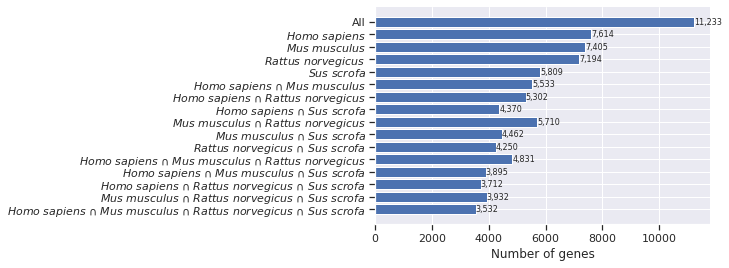

In [19]:
staircase_plot_horiz(overlap_sets)

In our analysis, we are interested in the human-centric consensus cardiac proteome which is based on the genes of Homo sapiens U (Mus musculus n Rattus norvegicus n Sus scrofa). These are Human genes which have an ortholog in at least one model organism species.

In [20]:
human_genes = set(overlap_sets['Homo sapiens'])
model_organisms = ['Mus musculus','Rattus norvegicus', 'Sus scrofa']
model_organism_genes = set()
for species in model_organisms:
    genes = set(overlap_sets[species])
    model_organism_genes = model_organism_genes.union(genes)
hccc_proteome_genes = human_genes.intersection(model_organism_genes)
print("%d genes in human"%len(human_genes))
print("%d genes in (mouse n rat n pig)"%len(model_organism_genes))
print("%d genes in human-centric consensus cardiac proteome"%len(hccc_proteome_genes))

7614 genes in human
9918 genes in (mouse n rat n pig)
6299 genes in human-centric consensus cardiac proteome


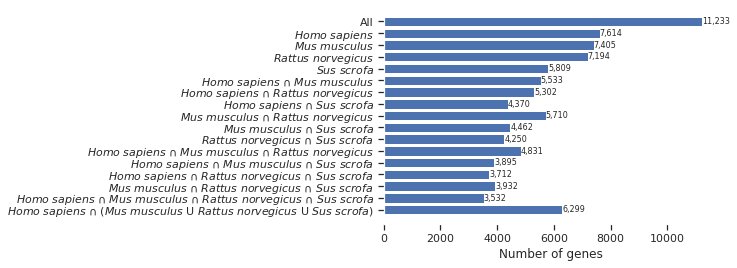

In [21]:
hccc_label = " ∩ ".join([ital_species('Homo sapiens'),
                       "(%s)"%" U ".join([ital_species(s) for s in model_organisms])])
new_overlap_sets = staircase_string_formatter(overlap_sets)
new_overlap_sets[hccc_label] = hccc_proteome_genes

staircase_plot_horiz_1(new_overlap_sets)

In [22]:
# How many proteins do these intersection genes correspond to?
hccc_proteome = set()
for gene in hccc_proteome_genes:
    for species,gene_to_proteins in species_to_gene_to_proteins.items():
        if gene in gene_to_proteins:
            proteins = gene_to_proteins[gene]
            for p in proteins:
                hccc_proteome.add(p)
print("%d proteins in the human-centric consensus cardiac proteome"%(len(hccc_proteome)))

30572 proteins in the human-centric consensus cardiac proteome


In [23]:
# output
with open("human_centric_consensus_cardiac_proteome.txt","w") as out_file:
    out_file.write("\n".join(hccc_proteome))
! ls human_centric_consensus_cardiac_proteome.txt
! wc -l human_centric_consensus_cardiac_proteome.txt

human_centric_consensus_cardiac_proteome.txt
30571 human_centric_consensus_cardiac_proteome.txt


## Group into Protein Groups by Uniref 90


In [114]:
uniprot_to_uniref_id, uniref_to_uniprot_ids =convert_string_ids_to_uniprot(hccc_proteome, 
                              out_file='./human_centric_consensus_cardiac_proteome_uniref90_mapping_table.tsv')

30571 out of 30572 UniProt ID's mapped to 21732 UniRef90 ID's
Wrote 30572 lines to file ./human_centric_consensus_cardiac_proteome_uniref90_mapping_table.tsv


## Get synonyms

In [111]:
! pip install environs

     |████████████████████████████████| 47 kB 4.1 MB/s eta 0:00:011


In [116]:
! pip install xmlschema

     |████████████████████████████████| 273 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 8.2 MB/s eta 0:00:01


Previous version, it was all in lower-case synonyms. Changes for this time using protexam:
* commenting out line 119 in protexam_process.py and removing '.lower()'
* removed lower() from protexam_query.py line 534
Steps:
1. Run protexam with --get_protein_aliases
2. Run protexam with --combine_aliases_by_uniref and the new aliases

In [117]:
! python ../../protexam/protexam/protexam.py --get_protein_aliases ./human_centric_consensus_cardiac_proteome.txt

** ProtExAM **
Retrieving UniProtKB entries for 30572 accessions.
XML output will be in multiple files.
100%|█████████████| 30572/30572 [14:53<00:00, 34.23 protein entries retrieved/s]
Parsing XML entries...
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot_entries_0.xml (1 out of 31 files).
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot_entries_1.xml (2 out of 31 files).
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot_entries_2.xml (3 out of 31 files).
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot_entries_3.xml (4 out of 31 files).
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot_entries_4.xml (5 out of 31 files).
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot_entries_5.xml (6 out of 31 files).
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot_entries_6.xml (7 out of 31 files).
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot_entries_7.xml (8 out of 31 files).
Parsing ../queries/ProteinQuery_2022-05-18_23_10_19/prot

In [122]:
! cp ../queries/ProteinQuery_2022-05-18_23_10_19/aliases.txt .
! head ./aliases.txt

P53621|Q5T201|Q8IXZ9|COPA_HUMAN|Coatomer_subunit_alpha|Alpha-coat_protein|HEP-COP|COPA
O88587|Q91XH4|COMT_MOUSE|Catechol_O-methyltransferase|Comt|Comt1
E7ETB4|E7ETB4_HUMAN|Clusterin|CLU
A0A286ZR74|A0A286ZR74_PIG|Angiomotin_like_1|AMOTL1
F1RP01|F1RP01_PIG|RAS_p21_protein_activator_1|RASA1
D3ZZ37|D3ZZ37_RAT|Mitochondrial_assembly_of_ribosomal_large_subunit_1|Malsu1|RGD1306936_predicted|rCG_52366
Q61029|Q3UCI5|Q61030|Q61031|Q61032|LAP2B_MOUSE|Lamina-associated_polypeptide_2,_isoforms_beta/delta/epsilon/gamma|Thymopoietin_isoforms_beta/delta/epsilon/gamma|Tmpo|Lap2
C9JAV2|C9JAV2_HUMAN|DCN1-like_protein|Defective_in_cullin_neddylation_protein_1-like_protein|DCUN1D2
Q99P75|Q6NS34|RAB9A_RAT|Ras-related_protein_Rab-9A|Rab9a|Rab9
C9JY20|C9JY20_HUMAN|Fragile_X_mental_retardation_syndrome-related_protein_1|FXR1


In [123]:
! python ../../protexam/protexam/protexam.py --combine_aliases_by_uniref ./aliases.txt ./human_centric_consensus_cardiac_proteome_uniref90_mapping_table.tsv

** ProtExAM **
Combining aliases in ./aliases.txt based on UniRef groups in ./human_centric_consensus_cardiac_proteome_uniref90_mapping_table.tsv
Parsed 30572 UniProt IDs with 178451 aliases.
Parsed 21732 UniRef IDs with 30571 protein IDs.
Wrote output to /home/ubuntu/ALEXANDER-Projects/2021-04-26_Cardiac_Proteome/cardiac_proteome_curation/combined_aliases.txt
Exiting...


In [124]:
! ls combined_aliases.txt
! head -n 20 combined_aliases.txt

combined_aliases.txt
UniRef90_P53621|F1RJX8_PIG|Coatomer_subunit_alpha|COPA
UniRef90_P22734|COMT_RAT|Catechol_O-methyltransferase|Comt
UniRef90_E7ETB4|E7ETB4_HUMAN|Clusterin|CLU
UniRef90_E1BEQ5|A0A286ZTR1_PIG|Angiomotin_like_1|AMOTL1
UniRef90_P50904|G3V9H0_RAT|Ras_GTPase-activating_protein_1|Rasa1
UniRef90_D3ZZ37|D3ZZ37_RAT|Mitochondrial_assembly_of_ribosomal_large_subunit_1|Malsu1|RGD1306936_predicted|rCG_52366
UniRef90_Q61029|Q3UCI5|Q61030|Q61031|Q61032|LAP2B_MOUSE|Lamina-associated_polypeptide_2,_isoforms_beta/delta/epsilon/gamma|Thymopoietin_isoforms_beta/delta/epsilon/gamma|Tmpo|Lap2
UniRef90_A0A0C4DFQ9|C9JAV2_HUMAN|DCN1-like_protein|Defective_in_cullin_neddylation_protein_1-like_protein|DCUN1D2
UniRef90_Q9R0M6|K7GKQ1|K7GPC9|F1SRI1_PIG|RAB9A,_member_RAS_oncogene_family|RAB9A
UniRef90_P51114|C9J5B4_HUMAN|Fragile_X_mental_retardation_syndrome-related_protein_1|FXR1
UniRef90_Q920A5|Q9D625|RISC_MOUSE|Retinoid-inducible_serine_carboxypeptidase|Serine_carboxypeptidase_1|Scpep1|Risc
UniR

In [138]:
! cp ./combined_aliases.txt ../caseolap/input/entities.txt